## The numerical solution of the transport equation using MPI technology

* Author: Hakob Petrosyan
* Group: 814

    No copyright.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X = 1
T = 1
K = 20000 
M = 10000
tau = T/K
h = X/M
u_analytical = np.zeros((10))
u_parallel = np.zeros((10))

In [104]:
def get_analytical(u):
    """
    This function analyticaly calculate the last 10 values values of 
    scheme for every point of grid.
    """
    for m in range(M-9, M+1):
        u[m+9-M] = m*h*T - 0.5*pow(T,2) + pow(2*T-m*h,2)/8 + np.exp(-(T - 0.5*m*h))  
    return u

Let's for clarity compare the last 10 values computed by 5 nodes with the values computed analyticaly.

In [113]:
def get_parallel(u_parallel):
    """
    This function get  the last 10 values of parallel solution computed.
    """
    with open(r"C:\Users\Lenovo\Desktop\KissMe\MIPT\MPI\DiffScheme\NodeFiles\5nodes.txt") as f:
        lines = f.readlines()
        pos_from_end = 0
        quit = False
        for line in reversed(lines):
            values = np.array(list(map(float, line.split())))
            for i, value in zip(range(10), values[::-1]):
                    u_parallel[9-i] = value
            break
        return u_parallel

As we see the accuracy suits us

In [114]:
u_analytical = get_analytical(u_analytical) 
u_parallel = get_parallel(u_parallel)
u_analytical - u_parallel

array([-1.71164322e-05, -1.18240353e-05, -1.65276226e-05, -1.12271941e-05,
       -1.59227498e-05, -1.06142895e-05, -1.53018132e-05, -9.98532079e-06,
       -1.46648122e-05, -9.34028737e-06])

### Visualisation of acceleration and effectiveness

In [96]:
T_1 = 25.3395
S = np.zeros((6)) # acceleration
E = np.zeros((6)) # effectiveness
two = np.array([12.8122, 12.8122])
tree = np.array([8.69891, 8.71624, 8.70137])
four = np.array([7.37741, 6.61957, 7.37595, 6.60064])
five = np.array([6.26986, 6.28977, 7.03082, 7.06816, 6.27565])
six = np.array([7.26073, 6.95501, 7.57238, 7.73278, 7.12374, 7.25431])
seven = np.array([10.1275, 9.84389, 10.1827, 9.85018, 11.1968, 9.98072, 9.93127])
for i, array in zip(range(0, 6),list([two, tree, four, five, six, seven])):
    S[i] = T_1 / array.mean()
    E[i] = S[i]/(2+i)

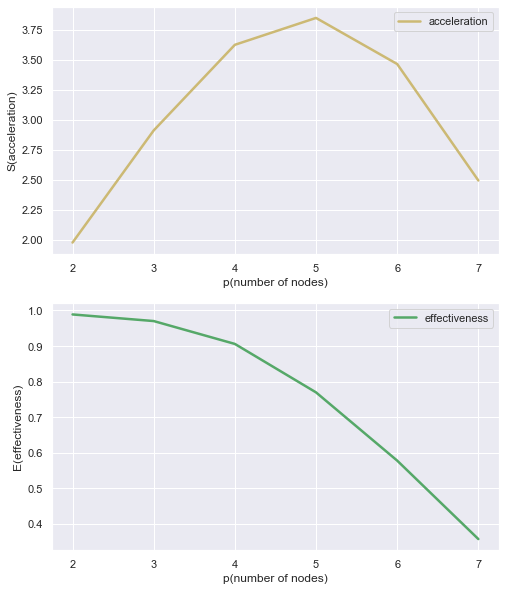

In [99]:
fig = plt.figure(figsize = (8, 10))

p = np.linspace(2, 7, 6)
plt.subplot(2, 1, 1)
plt.plot(p, S, linewidth = 2.5, c = "y", label = "acceleration")
plt.xlabel("p(number of nodes)")
plt.ylabel("S(acceleration)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(p, E, linewidth = 2.5, c = "g", label = "effectiveness")
plt.xlabel("p(number of nodes)")
plt.ylabel("E(effectiveness)")
plt.legend()

plt.savefig("acc_eff.png")